In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Weather Data.csv", index_col="Date/Time", parse_dates=["Date/Time"])

In [3]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB


In [5]:
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

<b>Q. all the unique 'Wind Speed' values in the data.</b>

In [6]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

<b>Q. the number of times when the 'Weather is exactly Clear'.</b>

In [7]:
df[df['Weather'] == 'Clear'].shape[0]

1326

<b>Q. the number of times when the 'Wind Speed was exactly 4 km/h'.</b>

In [8]:
df[df['Wind Speed_km/h'] == 4].shape[0]

474

<b>Q. Rename the column name 'Weather' of the dataframe' to 'Weather Condition'.</b>

In [9]:
df.rename({'Weather': 'Weather Condition'}, axis=1, inplace=True)

In [10]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


<b>Q. What is the Variance of 'Relative Humidity' in this data ?</b>

In [11]:
df['Rel Hum_%'].var()

286.24855019850196

In [12]:
mean = df['Rel Hum_%'].mean()

In [13]:
np.sum(np.square(df['Rel Hum_%'] - mean)) / (len(df['Rel Hum_%']) - 1)

286.24855019850196

<b>Q. Find out all the Null Values in the data.</b>

In [14]:
df.isnull().any()

Temp_C               False
Dew Point Temp_C     False
Rel Hum_%            False
Wind Speed_km/h      False
Visibility_km        False
Press_kPa            False
Weather Condition    False
dtype: bool

<b>Q. What is the mean 'Visibility'?</b>

In [15]:
df['Visibility_km'].mean()

27.664446721311478

<b>Q. Find all instances when 'Snow' was recorded.</b>

In [16]:
df[df['Weather Condition'].str.contains('Snow')]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
Date/Time,,,,,,,
2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow


<b>Q. Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.</b>

In [17]:
df[(df['Wind Speed_km/h'] > 24) & (df['Visibility_km'] == 25) ]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
Date/Time,,,,,,,
2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...
2012-12-28 17:00:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
2012-12-30 17:00:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear


<b>Q. What is the Mean value of each column against each Weather condition?</b>

In [18]:
df.groupby('Weather Condition').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


<b>Q. What is the Minimum & Maximum value of each column against each weather condition?</b>

In [19]:
df.groupby('Weather Condition').max()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,32.8,20.4,99,33,48.3,103.63
Cloudy,30.5,22.6,99,54,48.3,103.65
Drizzle,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",1.1,0.6,98,32,9.7,100.15
Fog,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,-2.3,-3.3,93,26,12.9,101.02


In [20]:
df.groupby('Weather Condition').min()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,-23.3,-28.5,20,0,11.3,99.52
Cloudy,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",0.3,-0.1,92,7,2.4,97.79
Fog,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,-9.0,-12.2,78,6,4.8,98.44


<b>Q. Find all instances when 'Weather is Clear' or 'Visibility' is above 40.</b>

In [21]:
df[(df['Weather Condition'].str.contains('Clear')) | (df['Visibility_km'] > 40)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
Date/Time,,,,,,,
2012-01-02 12:00:00,1.7,-6.2,56,48,24.1,99.21,Mainly Clear
2012-01-03 12:00:00,-14.9,-22.6,52,20,24.1,101.34,Mainly Clear
2012-01-03 13:00:00,-15.1,-22.4,54,22,24.1,101.34,Mainly Clear
2012-01-03 14:00:00,-14.9,-22.9,50,22,24.1,101.38,Mainly Clear
2012-01-03 15:00:00,-14.8,-22.2,53,19,24.1,101.44,Mainly Clear
...,...,...,...,...,...,...,...
2012-12-30 18:00:00,-12.6,-16.0,76,24,25.0,101.36,Mainly Clear
2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
2012-12-30 20:00:00,-13.8,-16.5,80,24,25.0,101.52,Clear


## <font color='purple'>Data Visualization</font>

In [22]:
df.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date/Time', length=8784, freq=None)

<AxesSubplot: xlabel='Date/Time'>

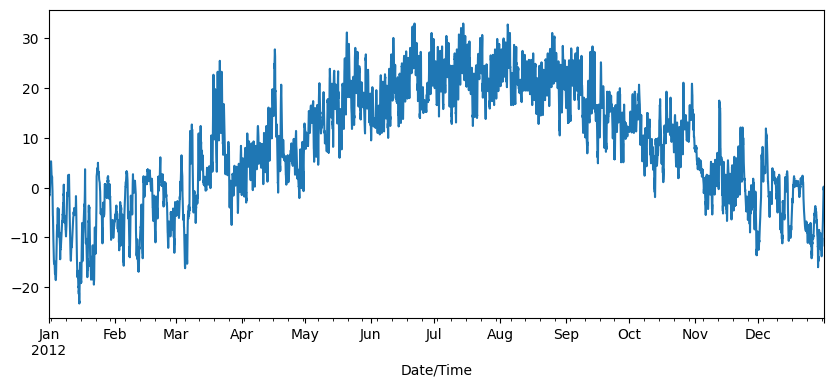

In [23]:
plt.figure(figsize=(10, 4))
df['Temp_C'].plot()

<AxesSubplot: title={'center': 'Average tempreture per month'}, xlabel='Date/Time'>

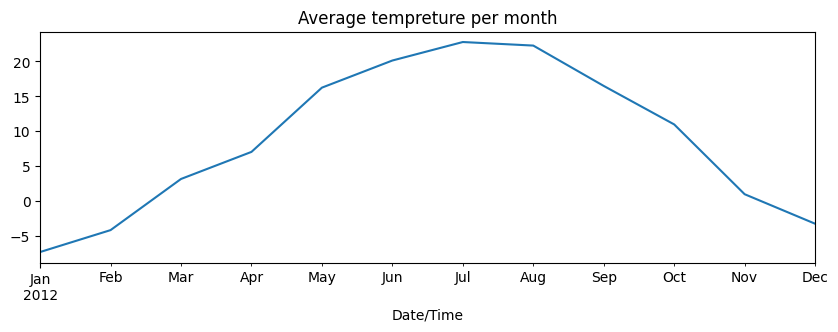

In [24]:
df['Temp_C'].resample('M').mean().plot(figsize=(10,3), title='Average tempreture per month')

<AxesSubplot: title={'center': 'Average wind speed per month'}, xlabel='Date/Time'>

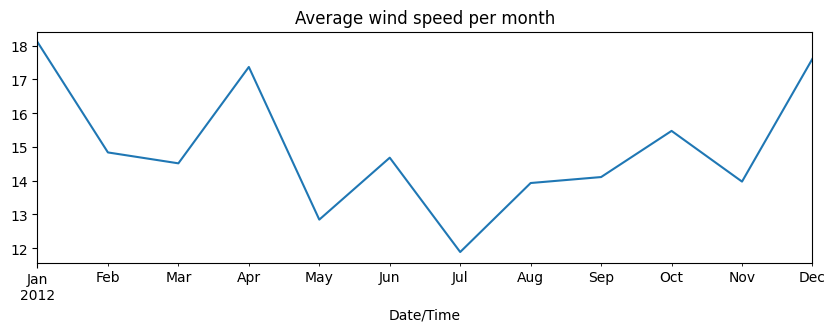

In [25]:
df['Wind Speed_km/h'].resample('M').mean().plot(figsize=(10,3), title='Average wind speed per month')